In [1]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
import gym_flappyBird
import genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

pygame 2.0.2 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Maschine

<img src="sprites/bestaerkendes-lernen.png" align="left" >

## Feature extrahieren

<img src="sprites/ingame.jpg" align="left" >

In [2]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 1))

### https://pytorch.org/docs/stable/nn.html#linear-layers
### https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid


In [3]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [4]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.3527, -0.3038,  0.0264, -0.3438, -0.3419],
        [ 0.1659,  0.0367, -0.2852,  0.2371, -0.1144],
        [-0.3399, -0.4222, -0.1214,  0.2956,  0.2049],
        [ 0.3334,  0.3883,  0.1040, -0.1597, -0.2647],
        [ 0.4369,  0.3627, -0.4011,  0.1948, -0.1103]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.3629,  0.3631, -0.3233, -0.3608,  0.2448], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2524,  0.0472, -0.2738, -0.2851,  0.1858],
        [-0.2127,  0.2941,  0.2140, -0.0262,  0.4237],
        [ 0.0878, -0.0806,  0.4238,  0.1420, -0.2625],
        [ 0.3510,  0.0924, -0.2597, -0.1044, -0.3575],
        [-0.1199, -0.4101, -0.3594, -0.0104, -0.3661]], requires_grad=True)
2.bias Parameter containing:
tensor([ 0.2372,  0.2391,  0.3843, -0.1716, -0.2146], requires_grad=True)
4.weight Parameter containing:
tensor([[ 0.0212, -0.3065, -0.4196, -0.1287,  0.0071]], requires_grad=True)
4.bias Parameter containing:
tens

# Aktion festlegen

  
## Bird attributes

### bird.forceX 
### bird.forceY 

### bird.speedX  (default 20)

In [5]:
def birdAction(decission, bird):
        bird.forceY =50*decission[0]


## Reward  berechnen

<img src="sprites/ingame_2.jpg" align="left" >

In [6]:
def computeReward(state_old, state_new):
    return 1

# Mutationsparameter

<img src="sprites/ingame_3.jpg" align="left" >

In [7]:
POPULATION_SIZE = 50 #Anzahl der Vögel in der Population
PARENTS_COUNT = 10 #Anzahl der besten Vögel, aus denen dann mutiert wird
NOISE_STD = 0.1 #Mutationsstärke 

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [8]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [9]:
Score_Max = 4000

In [ ]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  234.0  Score Spiel:  234.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.2258, -0.2131, -0.1516, -0.5293, -0.1174],
        [ 0.4704,  0.3220, -0.8057,  0.1514, -0.2882],
        [-0.0334, -0.2453, -0.0220,  0.0895,  0.3167],
        [ 0.7621,  0.1225, -0.1378, -0.1140, -0.0145],
        [ 0.7899,  0.3970, -0.2337,  0.3158,  0.2500]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.1745,  0.3850, -0.4374, -0.5387, -0.0093], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.5833,  0.1474, -0.5207, -0.1688,  0.1611],
        [-0.4920,  0.3787,  0.0976,  0.0402,  0.6335],
        [ 0.0692, -0.3495,  0.2817,  0.0147,  0.2536

# Plott

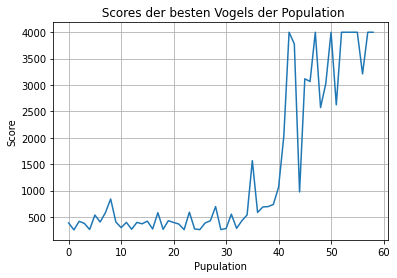

In [12]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

In [13]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  1
____________________________________________________________________________
Score:  387.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.2628, -0.3972, -0.2392, -0.4395, -0.3048],
        [-0.2636, -0.1102,  0.2013,  0.1812, -0.3084],
        [-0.3233,  0.1421,  0.1352,  0.1036,  0.5309],
        [-0.4126, -0.5838,  0.2780, -0.2040, -0.1678],
        [ 0.4728,  0.3593, -0.0398, -0.0173,  0.2502]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.2220, -0.3213,  0.2928, -0.2826, -0.2731], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0663,  0.2595,  0.0683,  0.0131, -0.1738],
        [-0.0707, -0.2943,  0.4500, -0.4879, -0.2655],
        [ 0.1923,  0.1683, -0.4462, -0.3773, -0.1236],
        [ 0.4589, -0.0666, -0.0639,  

2.bias Parameter containing:
tensor([-0.2294,  0.5119,  0.7642,  0.4160,  0.5020], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.0602, -0.3556, -0.4609,  0.6329, -1.1038]], requires_grad=True)
4.bias Parameter containing:
tensor([0.7648], requires_grad=True)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  29
____________________________________________________________________________
Score:  697.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.0180, -0.7963, -0.8498, -0.8604, -0.2180],
        [-0.2146,  0.0991,  0.2720,  0.3246,  0.1404],
        [-0.8257,  0.4514,  0.3791,  0.1331,  0.5328],
        [-0.3949,  0.0039, -0.1906,  0.4968, -0.0714],
        [ 0.6563,  0.7891, -0.1400, -0.8915, -0.3429]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.6439, -0.5640, -0.2

2.weight Parameter containing:
tensor([[ 0.5285,  1.3502,  0.7010, -1.2508,  1.5100],
        [-0.9884, -0.2508, -0.3324, -0.7309, -1.0484],
        [ 0.6874, -1.6536, -0.7342, -0.3325,  1.7707],
        [ 0.5223, -1.5174, -0.7797,  0.9332,  1.7126],
        [-0.1147, -0.2212, -0.7458, -0.1738,  0.9820]], requires_grad=True)
2.bias Parameter containing:
tensor([0.4125, 0.2428, 0.5267, 0.1549, 0.3818], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.6800,  0.6298, -0.6716, -0.4813, -0.9540]], requires_grad=True)
4.bias Parameter containing:
tensor([1.8922], requires_grad=True)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  58
____________________________________________________________________________
Score:  4000.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 3.2514e-01, -1.0755e+0